   StudentID  StudyHours ParentalEducation  Attendance  Gender  Score
0          1           2       High School          70    Male     55
1          2           5          Bachelor          85  Female     78
2          3           3            Master          90  Female     88
3          4           1       High School          60    Male     45
4          5           4          Bachelor          80  Female     75
       StudentID  StudyHours  Attendance      Score
count   20.00000    20.00000   20.000000  20.000000
mean    10.50000     3.60000   80.500000  72.950000
std      5.91608     1.63514   12.525763  16.080308
min      1.00000     1.00000   55.000000  40.000000
25%      5.75000     2.00000   70.000000  59.750000
50%     10.50000     3.50000   82.500000  76.000000
75%     15.25000     5.00000   90.000000  85.500000
max     20.00000     6.00000   98.000000  95.000000
                               StudentID  StudyHours  Attendance     Score  \
StudentID                       1.

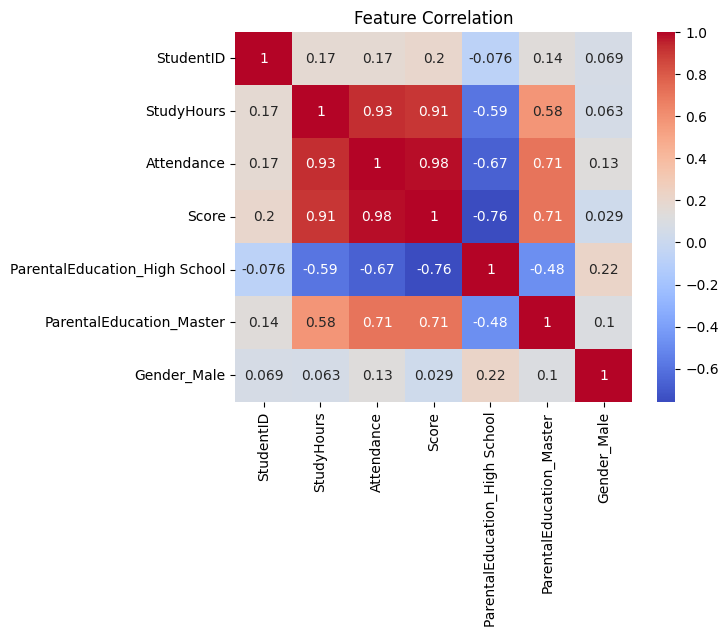

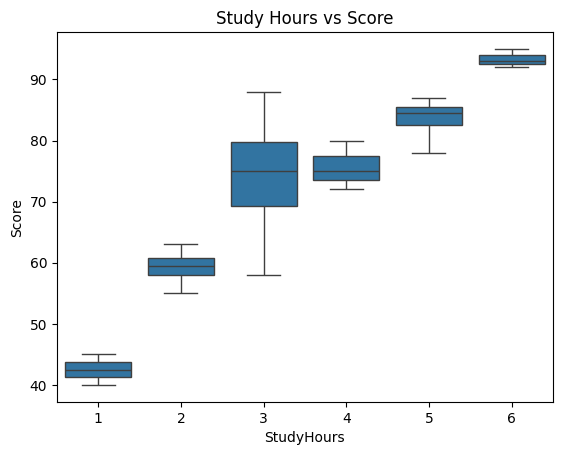

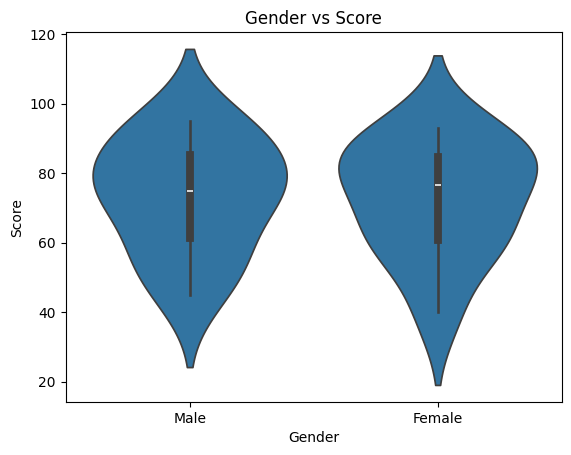

In [5]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv('student_data.csv')
print(df.head())

# Step 3: Clean data
df.dropna(inplace=True)  # Remove missing values if any
df['ParentalEducation'] = df['ParentalEducation'].str.strip()
df['Gender'] = df['Gender'].str.strip()

# Step 4: Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Step 5: Summary statistics
print(df.describe())

# Step 6: Correlation
print(df.corr())

# Step 7: Visualization
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

sns.boxplot(x='StudyHours', y='Score', data=pd.read_csv('student_data.csv'))
plt.title('Study Hours vs Score')
plt.show()

sns.violinplot(x='Gender', y='Score', data=pd.read_csv('student_data.csv'))
plt.title('Gender vs Score')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# Features & Target
X = df.drop('Score', axis=1)
y = df['Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Save model
pickle.dump(model, open('model.pkl', 'wb'))


MAE: 0.5574999999999974
R² Score: 0.9923524916943521
